In [115]:
import tensorflow as tf
import keras
import matplotlib
import numpy as np

In [116]:
np.__version__, tf.__version__

('1.26.4', '2.16.1')

In [117]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt

In [118]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

In [119]:
X_treinamento, X_treinamento.max()

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [120]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Text(0.5, 1.0, 'Classe5')

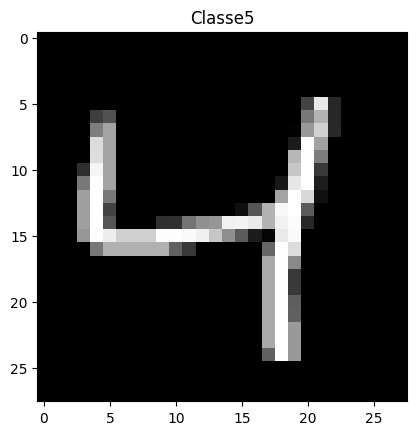

In [121]:
plt.imshow(X_treinamento[2], cmap='gray')
plt.title('Classe' + str(y_treinamento[0]))

In [122]:
X_treinamento.shape

(60000, 28, 28)

In [123]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1)

In [124]:
X_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

In [125]:
X_treinamento.shape

(60000, 28, 28, 1)

In [126]:
X_treinamento = X_treinamento.astype('float32')

In [127]:
X_teste = X_teste.astype('float32')

In [128]:
X_treinamento /= 255 

In [129]:
X_teste /=255

In [130]:
X_treinamento.max(), X_teste.min()

(1.0, 0.0)

In [131]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [132]:
y_treinamento = np_utils.to_categorical(y_treinamento,10)
y_teste = np_utils.to_categorical(y_teste,10)

In [133]:
y_treinamento[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [134]:
rede_neural = Sequential()
rede_neural.add(InputLayer(shape =(28 ,28 , 1)))

rede_neural.add(Conv2D(filters=32, kernel_size= (3,3),activation='relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size =(2,2)))

rede_neural.add(Conv2D(filters=32, kernel_size= (3,3),activation='relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size =(2,2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(units=128,activation = 'relu'))
rede_neural.add(Dropout(0.2))
rede_neural.add(Dense(units=128,activation = 'relu'))
rede_neural.add(Dropout(0.2))
rede_neural.add(Dense(units=10, activation= 'softmax'))

In [135]:
rede_neural.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,154 (508.41 KB)

 Trainable params: 130,026 (507.91 KB)

 Non-trainable params: 128 (512.00 B)

In [136]:
rede_neural.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics =['accuracy'])
            

In [137]:
rede_neural.fit(X_treinamento, y_treinamento, batch_size = 128,
                epochs = 5, validation_data = (X_teste,y_teste))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.8644 - loss: 0.4339 - val_accuracy: 0.9702 - val_loss: 0.1032
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9798 - loss: 0.0695 - val_accuracy: 0.9881 - val_loss: 0.0380
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9861 - loss: 0.0464 - val_accuracy: 0.9885 - val_loss: 0.0361
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9900 - loss: 0.0337 - val_accuracy: 0.9858 - val_loss: 0.0436
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9917 - loss: 0.0276 - val_accuracy: 0.9881 - val_loss: 0.0448


In [138]:
resultado = rede_neural.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9838 - loss: 0.0585


In [139]:
resultado

[0.04484349116683006, 0.988099992275238]